In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
data = pd.read_csv('country.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [12]:
data.shape

(6, 4)

In [13]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [14]:
x.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


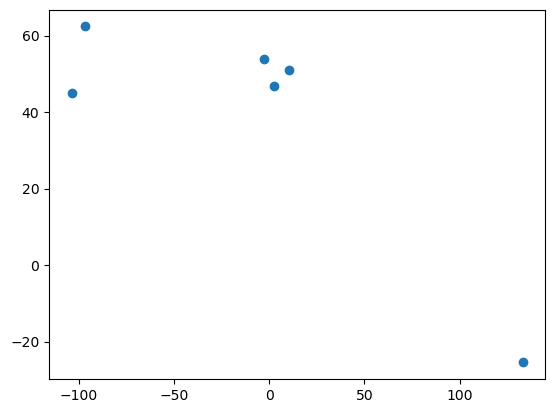

In [15]:
plt.scatter(x['Longitude'],x['Latitude'])


In [16]:
kmeans = KMeans(3)
kmeans.fit(x)

/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 1, 1, 2], dtype=int32)

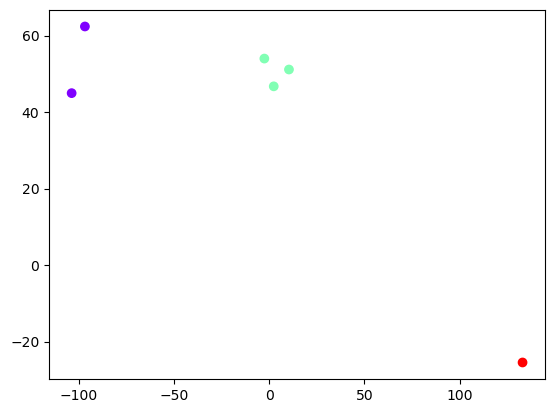

In [18]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

## Elbow Method to Determine Optimal Number of Clusters using SSE

__n_clusters:__ This parameter specifies the number of clusters to form. In the example code, it is set to k, which is a variable that iterates from 1 to 6 to evaluate the optimal number of clusters.

__max_iter:__ This parameter specifies the maximum number of iterations for each run of the K-means algorithm. The algorithm will stop iterating if the convergence criterion is met before the maximum number of iterations is reached. In the example code, it is set to 300.

/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dr-pc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/dr-pc/anaconda3/li

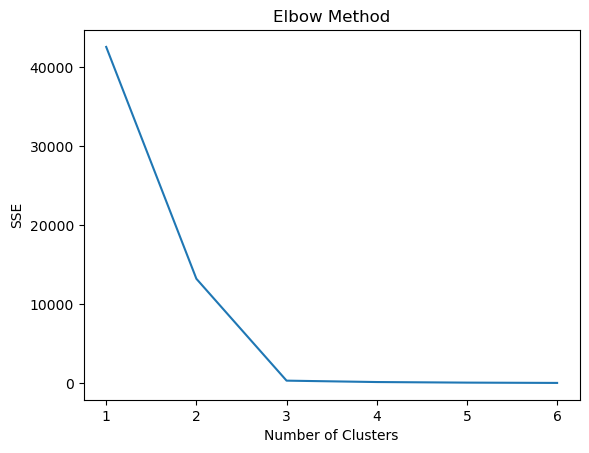

In [19]:
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

number_clusters = range(1, 7)
plt.plot(number_clusters, sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [24]:
new_data = x
new_data

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [21]:
# Assuming the optimum number of clusters is 3 and you have new data 'new_data'
kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)
labels = kmeans.predict(new_data)   

In [22]:
labels

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
file1 = pd.read_csv("1.csv")

# Drop duplicates and missing values
file1.drop_duplicates(inplace=True)
file1.dropna(inplace=True)

# Encode categorical variables (if any)
file1_encoded = pd.get_dummies(file1, columns=['Gender'])

# Extract features (excluding CustomerID)
features = file1_encoded.drop(columns=['CustomerID'])

# Include CustomerID as a feature
features['CustomerID'] = file1['CustomerID']

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize clusters (using relevant features)
# Select two features for visualization (e.g., the first two features)
feature1 = features.columns[0]  # Change 0 to the index of the desired feature
feature2 = features.columns[1]  # Change 1 to the index of the desired feature
feature2
# plt.scatter(features[feature1], features[feature2], c=cluster_labels, cmap='viridis')
# plt.xlabel(feature1)
# plt.ylabel(feature2)
# plt.title('K-means Clustering')
# plt.show()
# print(file1)

FileNotFoundError: [Errno 2] No such file or directory: '1.csv'